<a href="https://colab.research.google.com/github/MartinMarzi/IPMdecisions/blob/main/IPMdecisions-DataExploration_colab-1_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For colab
%pip install umap-learn
%pip install hdbscan
%pip install babyplots

In [45]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from pandas.api.types import CategoricalDtype
import umap
import hdbscan
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from babyplots import Babyplot


In [46]:
#DATA_FILE = "data/Farmers_edited data 21.12.2020_IPS_FINAL- WEKA_JM.xlsx"
DATA_FILE = "https://kt-cloud.ijs.si/index.php/s/zyLj9jkFQFqJfoQ/download"

In [47]:
# Create dataframe
df = pd.read_excel(DATA_FILE, header=0, engine='openpyxl', na_values=['?'], usecols=range(81), 
                   skiprows= range(150,155))

In [48]:
# Show data size
df.shape

(149, 81)

In [360]:
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)

In [50]:
df

,Region,Country,Subject,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,ProductionUse_selling,Farm_type_Conventional,Farm_type_Intergrated,Farm_type_Organic,Farm_type_Biodynamic,Income_Cat,Proportion_of_income,Production_level_1to7,Production_level_1to3,Crop_Group_Cat,Legislative_requirements,Own_phone,Years_own_phone,Use_DSS_App,Agricultural_app_use_Cat,Computer_at_home,Speed_internet_Cat,Already_used_DSS,How_do_you_access_DSS_Cat,Potencial_user_of_platform,Prefered_access_Phone,Prefered_access_PC,Prefered_access_Advisor,Willing_to_try_new_products_Cat,Price_important_factor,DSS_are_more_suited_for_ShortTermDecision_1,DSS_are_more_suited_for_LongTermDecision_2,DSS_for_ShortLongTermBothDecision_Cat_NO,Prefered_type_Web_1,Prefered_type_Software_2,Prefered_type_Web_Software_Both_Cat_NO,Importance_of_easy_to_use_1to7,Importance_of_easy_to_use_1to2,Importance_of_easy_to_use_1to3,Importance_of_efficient_1to7,Importance_of_efficient_1to2,Importance_of_efficient_1to3,Importance_low_price_1to7,Importance_low_price_1to2,Importance_low_price_1to3,Importance_polyvalence_1to7,Importance_polyvalence_1to2,Importance_polyvalence_1to3,Enjoy_using_new_techs_1to7,Enjoy_using_new_techs_1to2,Enjoy_using_new_techs_1to3,Appreciate_change_1to7,Appreciate_change_1to2,Appreciate_change_1to3,Trust_in_DSS_1to7,Trust_in_DSS_1to2,Trust_in_DSS_1to3,Trust_in_colleague_advice_1to7,Trust_in_colleague_advice_1to2,Trust_in_colleague_advice_1to3,Trust_advice_friend_1to7,Trust_advice_friend_1to2,Trust_advice_friend_1to3,Need_IT_teaching_Cat,DSS_can_improve_your_productivity_Cat,CL_Output_preference_Graphical_1,CL_Output_preference_Textual_2,CL_Output_preference_Both_3,Output_preference_Cat_NO,Share_DSS_exp_with_colleague_Cat,Use_DSS_from_trusted_sources_Always,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Use_same_DSS_than_advisor_Cat,Age_of_DSS_user_at_the_farm_1,Age_of_DSS_user_at_the_farm_2,Age_of_DSS_user_at_the_farm_3,Marketing_info_about_DSS_Cat,Manufacturer_demo_of_DSS_Cat
0,south_EU,Italy,ITALY1,4,1.0,1.0,5.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,7.0,3.0,1.0,1.0,1,0,1.0,2.0,1,3,0.0,1.0,0.0,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
1,south_EU,Italy,ITALY2,4,1.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,4.0,2.0,2.0,NaN,1,0,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,3.0,7.0,2.0,3.0,6.0,2.0,2.0,2.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,2.0,NaN,0.0,1.0,0.0,2.0,2.0
2,south_EU,Italy,ITALY3,2,1.0,2.0,5.0,1.0,1.0,0.0,0.0,0.0,2.0,100.0,5.0,3.0,1.0,1.0,1,10,1.0,2.0,1,2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,7.0,2.0,3.0,7.0,2.0,3.0,5.0,1.0,2.0,7.0,2.0,3.0,4.0,1.0,1.0,4.0,1.0,1.0,5.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,2.0,2.0,3.0,0.0,0.0,1.0,3.0,1.0,NaN,2.0,2.0,1.0,NaN,NaN,NaN,2.0,2.0
3,south_EU,Italy,ITALY4,2,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,5.0,90.0,5.0,3.0,1.0,1.0,1,10,0.0,NaN,1,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,7.0,2.0,3.0,6.0,2.0,2.0,4.0,1.0,1.0,6.0,2.0,2.0,6.0,2.0,2.0,6.0,2.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,0.0,0.0,1.0,3.0,NaN,NaN,3.0,2.0,NaN,1.0,0.0,0.0,NaN,1.0
4,south_EU,Italy,ITALY5,2,1.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,4.0,2.0,2.0,1.0,1,10,1.0,3.0,1,2,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,7.0,2.0,3.0,7.0,2.0,3.0,4.0,1.0,1.0,6.0,2.0,2.0,5.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,0.0,0.0,1.0,3.0,3.0,1.0,3.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,south_EU,Greece,GR12315,4,1.0,2.0,3.0,NaN,NaN,N

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 81 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Region                                       149 non-null    object 
 1   Country                                      149 non-null    object 
 2   Subject                                      149 non-null    object 
 3   Age_Cat                                      149 non-null    int64  
 4   Gender_1male                                 148 non-null    float64
 5   Degree_Cat                                   144 non-null    float64
 6   Farm_size_Cat                                148 non-null    float64
 7   ProductionUse_selling                        117 non-null    float64
 8   Farm_type_Conventional                       116 non-null    float64
 9   Farm_type_Intergrated                        116 non-null    float64
 10  Fa

In [52]:
# Remove duplicate features and "Subject" feature.
df= df.drop(["Subject", "Production_level_1to7", "DSS_for_ShortLongTermBothDecision_Cat_NO", "Prefered_type_Web_Software_Both_Cat_NO", 
            "Importance_of_easy_to_use_1to7", "Importance_of_easy_to_use_1to2", "Importance_of_efficient_1to7", "Importance_of_efficient_1to2", 
            "Importance_low_price_1to7", "Importance_low_price_1to2", "Importance_polyvalence_1to7", "Importance_polyvalence_1to2", 
            "Enjoy_using_new_techs_1to7", "Enjoy_using_new_techs_1to2", "Appreciate_change_1to7", "Appreciate_change_1to2",
            "Trust_in_DSS_1to7", "Trust_in_DSS_1to2", "Trust_in_colleague_advice_1to7", "Trust_in_colleague_advice_1to2",
            "Trust_advice_friend_1to7", "Trust_advice_friend_1to2", "Output_preference_Cat_NO"], axis=1)

In [53]:
df.shape

(149, 58)

In [54]:
# Descriptive statistics
df.describe()

,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,ProductionUse_selling,Farm_type_Conventional,Farm_type_Intergrated,Farm_type_Organic,Farm_type_Biodynamic,Income_Cat,Proportion_of_income,Production_level_1to3,Crop_Group_Cat,Legislative_requirements,Own_phone,Years_own_phone,Use_DSS_App,Agricultural_app_use_Cat,Computer_at_home,Speed_internet_Cat,Already_used_DSS,How_do_you_access_DSS_Cat,Potencial_user_of_platform,Prefered_access_Phone,Prefered_access_PC,Prefered_access_Advisor,Willing_to_try_new_products_Cat,Price_important_factor,DSS_are_more_suited_for_ShortTermDecision_1,DSS_are_more_suited_for_LongTermDecision_2,Prefered_type_Web_1,Prefered_type_Software_2,Importance_of_easy_to_use_1to3,Importance_of_efficient_1to3,Importance_low_price_1to3,Importance_polyvalence_1to3,Enjoy_using_new_techs_1to3,Appreciate_change_1to3,Trust_in_DSS_1to3,Trust_in_colleague_advice_1to3,Trust_advice_friend_1to3,Need_IT_teaching_Cat,DSS_can_improve_your_productivity_Cat,CL_Output_preference_Graphical_1,CL_Output_preference_Textual_2,CL_Output_preference_Both_3,Share_DSS_exp_with_colleague_Cat,Use_DSS_from_trusted_sources_Always,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Use_same_DSS_than_advisor_Cat,Age_of_DSS_user_at_the_farm_1,Age_of_DSS_user_at_the_farm_2,Age_of_DSS_user_at_the_farm_3,Marketing_info_about_DSS_Cat,Manufacturer_demo_of_DSS_Cat
count,149.00000,148.000000,144.000000,148.000000,117.000000,116.000000,116.000000,116.000000,116.000000,144.000000,145.000000,107.000000,117.000000,138.000000,149.000000,149.000000,145.000000,97.000000,149.000000,149.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,143.000000,146.000000,142.000000,142.000000,137.000000,137.000000,140.000000,142.000000,136.000000,136.000000,147.000000,148.000000,148.000000,148.000000,147.000000,147.000000,147.000000,143.000000,143.000000,143.000000,136.000000,118.000000,146.000000,146.000000,109.000000,118.000000,118.000000,118.000000,127.000000,143.000000
mean,3.09396,0.810811,2.722222,4.006757,0.820513,0.568966,0.413793,0.129310,0.008621,2.923611,71.595448,2.168224,1.461538,0.797101,0.973154,11.845638,0.779310,2.175258,0.986577,2.422819,0.731343,2.313433,0.582090,0.746269,0.410448,0.179104,1.188811,0.815068,0.619718,0.535211,0.751825,0.299270,2.578571,2.577465,1.860294,2.404412,2.115646,1.918919,1.662162,1.655405,1.619048,1.761905,3.176871,0.251748,0.055944,0.692308,2.257353,0.838983,2.376712,2.068493,1.651376,0.237288,0.347458,0.474576,1.692913,1.587413
std,1.11708,0.392989,0.999611,1.327350,0.385410,0.497369,0.494649,0.336999,0.092848,1.467979,34.910121,0.841001,0.637052,0.403623,0.162177,7.153458,0.416149,0.790705,0.115465,0.669623,0.444924,0.870726,0.495066,0.436778,0.493761,0.384879,0.392734,0.389578,0.487174,0.500524,0.433539,0.459619,0.668595,0.575184,0.790432,0.670861,0.726382,0.695109,0.566095,0.530855,0.553115,0.553115,0.699321,0.435543,0.230621,0.463161,0.666626,0.369114,0.696201,0.559033,0.478736,0.427235,0.478193,0.501483,0.556517,0.585369
min,1.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.00000,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,50.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,2.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.250000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.0000

In [55]:
# One hot encode categorical data.
ohe_df = pd.get_dummies(df, columns=["Region", "Country"])

In [56]:
ohe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 70 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age_Cat                                      149 non-null    int64  
 1   Gender_1male                                 148 non-null    float64
 2   Degree_Cat                                   144 non-null    float64
 3   Farm_size_Cat                                148 non-null    float64
 4   ProductionUse_selling                        117 non-null    float64
 5   Farm_type_Conventional                       116 non-null    float64
 6   Farm_type_Intergrated                        116 non-null    float64
 7   Farm_type_Organic                            116 non-null    float64
 8   Farm_type_Biodynamic                         116 non-null    float64
 9   Income_Cat                                   144 non-null    float64
 10  Pr

### Missing values

In [57]:
df_noNaN = ohe_df.dropna(how="any").copy()
#df_noNaN = ohe_df.copy().fillna(ohe_df.mean())
#df_noNaN = ohe_df.copy().fillna(ohe_df.median())
#df_noNaN = ohe_df.copy().fillna(ohe_df.mode())
#df_noNaN = ohe_df.interpolate(method="linear", axis=0).copy()
#df_noNaN = df.dropna(how="any").copy()

# df_noNaN.info()
# df_noNaN

# try scikit learn

### Changing data types to categorical (ordinal) and separating dataframes

In [58]:
"""
# Make CategoricalDtype parameter for ordered features.
oct = CategoricalDtype(ordered=True) 

# Make df with all unordered categorical data
uo_cat_df = ohe_df.astype("category")

# Make final cat_df with unordered and ordered categorical features and two numeric features
cat_df = uo_cat_df
cat_df[num_feat] = cat_df[num_feat].astype("float64")

# {name: oct for name in ord_feat}
cat_df = cat_df.astype({"Age_Cat":oct, "Degree_Cat":oct, "Farm_size_Cat":oct, "Income_Cat":oct, "Production_level_1to3":oct, "Agricultural_app_use_Cat":oct,
                       "Speed_internet_Cat":oct, "How_do_you_access_DSS_Cat":oct, "Importance_of_easy_to_use_1to3":oct, "Importance_of_efficient_1to3":oct, 
                        "Importance_low_price_1to3":oct, "Importance_polyvalence_1to3":oct, "Enjoy_using_new_techs_1to3":oct, "Appreciate_change_1to3":oct, 
                        "Trust_in_DSS_1to3": oct, "Trust_in_colleague_advice_1to3":oct, "Trust_advice_friend_1to3":oct, "Need_IT_teaching_Cat":oct,
                        "DSS_must_be_tailored_for_your_farm_Cat":oct, "Marketing_info_about_DSS_Cat":oct
                       })
"""

'\n# Make CategoricalDtype parameter for ordered features.\noct = CategoricalDtype(ordered=True) \n\n# Make df with all unordered categorical data\nuo_cat_df = ohe_df.astype("category")\n\n# Make final cat_df with unordered and ordered categorical features and two numeric features\ncat_df = uo_cat_df\ncat_df[num_feat] = cat_df[num_feat].astype("float64")\n\n# {name: oct for name in ord_feat}\ncat_df = cat_df.astype({"Age_Cat":oct, "Degree_Cat":oct, "Farm_size_Cat":oct, "Income_Cat":oct, "Production_level_1to3":oct, "Agricultural_app_use_Cat":oct,\n                       "Speed_internet_Cat":oct, "How_do_you_access_DSS_Cat":oct, "Importance_of_easy_to_use_1to3":oct, "Importance_of_efficient_1to3":oct, \n                        "Importance_low_price_1to3":oct, "Importance_polyvalence_1to3":oct, "Enjoy_using_new_techs_1to3":oct, "Appreciate_change_1to3":oct, \n                        "Trust_in_DSS_1to3": oct, "Trust_in_colleague_advice_1to3":oct, "Trust_advice_friend_1to3":oct, "Need_IT_t

In [59]:
# List of ordinal features
ord_feat = ["Age_Cat", "Degree_Cat", "Farm_size_Cat", "Income_Cat", "Production_level_1to3", "Agricultural_app_use_Cat", "Speed_internet_Cat", 
            "How_do_you_access_DSS_Cat", "Importance_of_easy_to_use_1to3", "Importance_of_efficient_1to3", "Importance_low_price_1to3", 
            "Importance_polyvalence_1to3", "Enjoy_using_new_techs_1to3", "Appreciate_change_1to3", "Trust_in_DSS_1to3", "Trust_in_colleague_advice_1to3", 
            "Trust_advice_friend_1to3", "Need_IT_teaching_Cat","DSS_can_improve_your_productivity_Cat", "Share_DSS_exp_with_colleague_Cat", 
            "WTP_for_DSS_Cat", "DSS_must_be_tailored_for_your_farm_Cat", "Marketing_info_about_DSS_Cat"]

# List of numeric features
num_feat = ["Years_own_phone", "Proportion_of_income"]

nom_feat = []

In [61]:
# df with ordinal and numeric featureas only
ordnum_df = pd.concat([df_noNaN[ord_feat], df_noNaN[num_feat]], axis=1).copy()

# Extract column names
all_col_names = list(df_noNaN.columns)
ordnum_col_names = list(ordnum_df.columns)
nom_col_names = [_ for _ in all_col_names if _ not in ordnum_col_names]

# List of nominal features
nom_feat = nom_col_names.copy()

# df with nominal features only (all but two ("Crop_Group_Cat" and "Willing_to_try_new_products_Cat") are binary)
# binarizarja ta dva
nom_df = df_noNaN[nom_col_names].copy()

# Dimensionality reduction

### Ordinal and numeric features

In [238]:
ordnum_df

,Age_Cat,Degree_Cat,Farm_size_Cat,Income_Cat,Production_level_1to3,Agricultural_app_use_Cat,Speed_internet_Cat,How_do_you_access_DSS_Cat,Importance_of_easy_to_use_1to3,Importance_of_efficient_1to3,Importance_low_price_1to3,Importance_polyvalence_1to3,Enjoy_using_new_techs_1to3,Appreciate_change_1to3,Trust_in_DSS_1to3,Trust_in_colleague_advice_1to3,Trust_advice_friend_1to3,Need_IT_teaching_Cat,DSS_can_improve_your_productivity_Cat,Share_DSS_exp_with_colleague_Cat,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Marketing_info_about_DSS_Cat,Years_own_phone,Proportion_of_income
4,2,2.0,5.0,5.0,2.0,3.0,2,3.0,3.0,3.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,2.0,2.0,10,0.0
5,1,2.0,2.0,1.0,3.0,2.0,3,2.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,5,100.0
6,1,2.0,3.0,1.0,3.0,1.0,2,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,5,100.0
9,3,2.0,4.0,3.0,3.0,3.0,3,1.0,3.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0,100.0
11,4,2.0,4.0,1.0,3.0,2.0,3,1.0,1.0,1.0,1.0,2.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,3,3.0,5.0,3.0,1.0,3.0,3,2.0,3.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,3.0,3.0,2.0,3.0,2.0,25,90.0
122,3,3.0,5.0,4.0,2.0,2.0,3,3.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,3.0,2.0,2.0,2.0,5,100.0
123,3,3.0,4.0,2.0,3.0,3.0,3,3.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,4.0,3.0,3.0,3.0,2.0,15,100.0
124,5,3.0,5.0,3.0,3.0,2.0,3,3.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,4.0,2.0,3.0,2.0,1.0,10,100.0


Text(0.5, 1.0, 'UMAP projection of IPM')

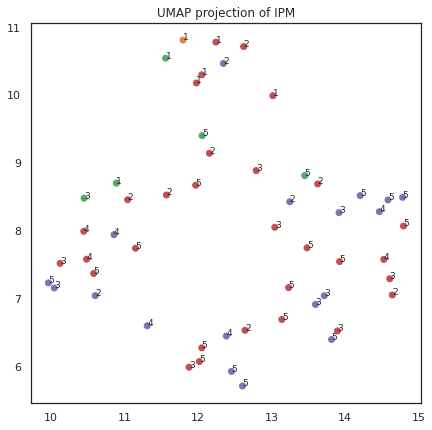

In [239]:
# Standardisation
scaled_array = StandardScaler().fit_transform(ordnum_df)
scaled_df = pd.DataFrame(scaled_array, columns=ordnum_df.columns)

# Mapping
reducer = umap.UMAP(n_neighbors=4, min_dist=0.1, n_components=2, metric="chebyshev", random_state=123)
ord_embedding = reducer.fit_transform(scaled_df)

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
fig, ax = plt.subplots(figsize=(7,7))
xs = ord_embedding[:, 0]
ys = ord_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in ordnum_df['DSS_can_improve_your_productivity_Cat']])

for i, val in enumerate(df_noNaN["Income_Cat"].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM')

### Nominal features

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1762: UserWarning:

gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable



Text(0.5, 1.0, 'UMAP projection of IPM')

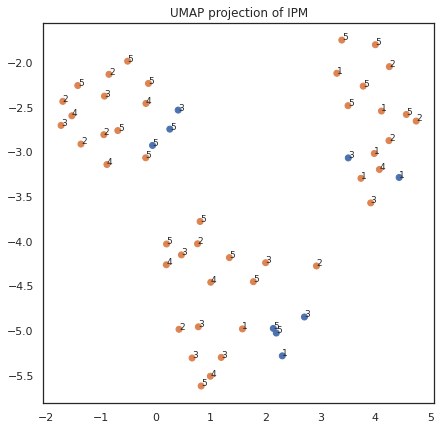

In [269]:
# scaled_array = StandardScaler().fit_transform(nom_df)
# scaled_df = pd.DataFrame(scaled_array, columns=nom_df.columns)

reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, metric="dice", random_state=123)
nom_embedding = reducer.fit_transform(nom_df)

fig, ax = plt.subplots(figsize=(7,7))
xs = nom_embedding[:, 0]
ys = nom_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in nom_df['Already_used_DSS']])

for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM')

# naredi for loop da odstranjaš posamično atribute

### Combine nominal and ordinal/numeric feature maps

In [64]:
# combine mappings
intersection_embedding = nom_embedding * ord_embedding
union_embedding = nom_embedding + ord_embedding

Text(0.5, 1.0, 'UMAP projection of IPM')

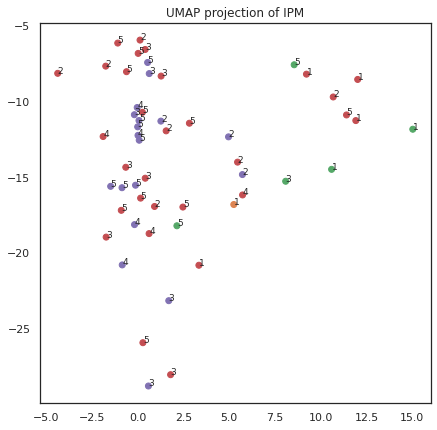

In [67]:
# plot intersection 2D embedding
fig, ax = plt.subplots(figsize=(7,7))
xs = intersection_embedding[:, 0]
ys = intersection_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in df_noNaN['DSS_can_improve_your_productivity_Cat']])

for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM')

Text(0.5, 1.0, 'UMAP projection of IPM')

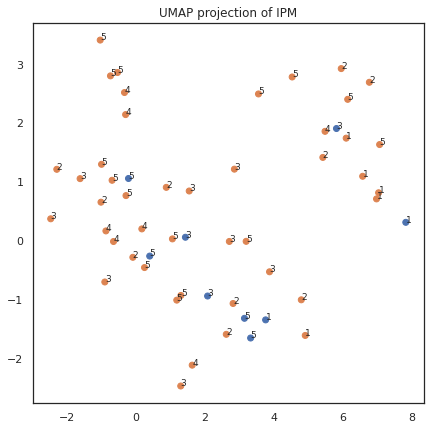

In [66]:
# plot union 2D embedding
fig, ax = plt.subplots(figsize=(7,7))
xs = union_embedding[:, 0]
ys = union_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in df_noNaN['Already_used_DSS']])

for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM')

# CLUSTERING

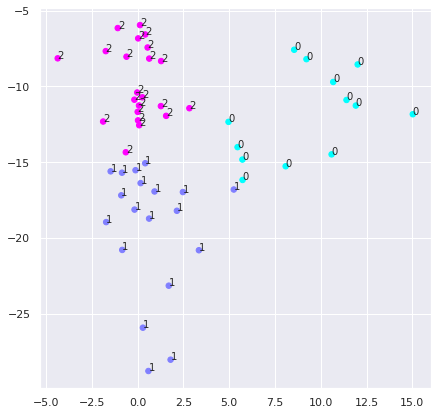

In [365]:
# kmeans clustering 2D intersection emnbedding
km_inters_clusters = cluster.KMeans(n_clusters=3).fit_predict(intersection_embedding)

# plot
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(intersection_embedding[:, 0], intersection_embedding[:, 1], c=km_inters_clusters, s=30, cmap='cool')

# daj clustre (številke) gor v umap
for i, val in enumerate(km_inters_clusters.tolist()):
    ax.annotate(str(int(val)), (intersection_embedding[:, 0][i], intersection_embedding[:, 1][i]), fontsize=10)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


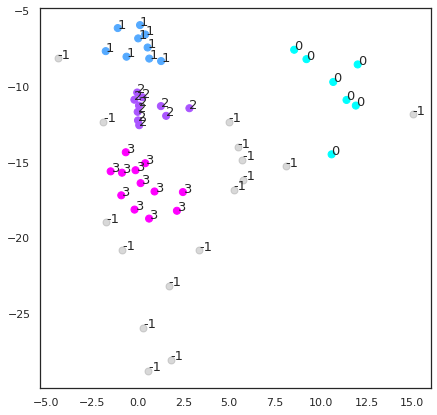

In [329]:
# hdbscan clustering 2D intersection emnbedding
clusterer = hdbscan.HDBSCAN(min_cluster_size=6, min_samples=2)
hdbscan_inters_clusters = clusterer.fit_predict(intersection_embedding)

fig, ax = plt.subplots(figsize=(7,7))

clustered = (hdbscan_inters_clusters >= 0)
ax.scatter(intersection_embedding[~clustered, 0],
            intersection_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=50,
            alpha=0.3)

ax.scatter(intersection_embedding[clustered, 0],
            intersection_embedding[clustered, 1],
            c=hdbscan_inters_clusters[clustered],
            s=50,
            cmap='cool')

for i, val in enumerate(hdbscan_inters_clusters):
    ax.annotate(str(int(val)), (intersection_embedding[:, 0][i], intersection_embedding[:, 1][i]), fontsize=13)

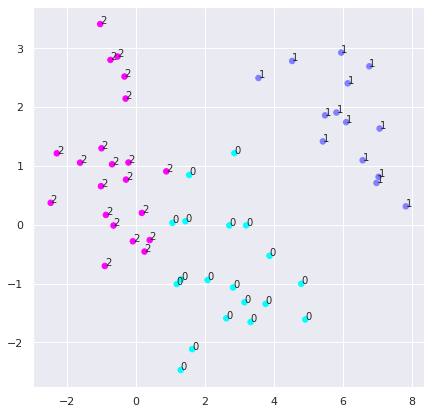

In [366]:
# kmeans clustering 2D union emnbedding
km_union_clusters = cluster.KMeans(n_clusters=3).fit_predict(union_embedding)
#kmeans_labels

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(union_embedding[:, 0], union_embedding[:, 1], c=km_union_clusters, s=30, cmap='cool')

# daj clustre (številke) gor v umap
for i, val in enumerate(km_union_clusters.tolist()):
    ax.annotate(str(int(val)), (union_embedding[:, 0][i], union_embedding[:, 1][i]), fontsize=10)

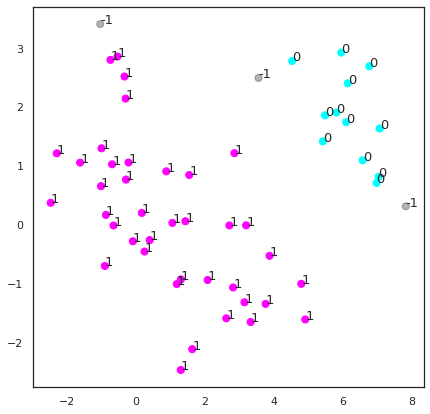

In [334]:
# hdbscan clustering 2D union emnbedding
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=6)
hdbscan_union_clusters = clusterer.fit_predict(union_embedding)

fig, ax = plt.subplots(figsize=(7,7))

clustered = (hdbscan_union_clusters >= 0)
ax.scatter(union_embedding[~clustered, 0],
            union_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=50,
            alpha=0.3)

ax.scatter(union_embedding[clustered, 0],
            union_embedding[clustered, 1],
            c=hdbscan_union_clusters[clustered],
            s=50,
            cmap='cool')

for i, val in enumerate(hdbscan_union_clusters):
    ax.annotate(str(int(val)), (union_embedding[:, 0][i], union_embedding[:, 1][i]), fontsize=13)

## Interactive 3D Visualisation

In [350]:
# 3D embedding
reducer3d = umap.UMAP(n_neighbors=4, min_dist=0.1, n_components=3, metric="chebyshev", random_state=123)
ord_embedding3d = reducer3d.fit_transform(ordnum_df)
nom_embedding3d = reducer3d.fit_transform(nom_df)

# combine mappings
intersection_embedding3d = nom_embedding3d * ord_embedding3d
union_embedding3d = nom_embedding3d + ord_embedding3d

# hdbscan
intersection_clusters = hdbscan.HDBSCAN(min_samples=3, min_cluster_size=5).fit_predict(intersection_embedding3d)
union_clusters = hdbscan.HDBSCAN(min_samples=3, min_cluster_size=5).fit_predict(union_embedding3d)
print("intersection_clusters :", intersection_clusters)
print("union_clusters :", union_clusters)

intersection_clusters : [2 0 0 0 0 0 1 0 3 0 0 2 0 0 0 3 0 0 0 3 0 0 3 0 0 0 1 0 3 0 2 0 0 1 0 2 0
 0 0 2 1 3 0 3 1 3 3 3 3 0 0 0 0 0]
union_clusters : [1 3 3 3 3 4 0 4 2 4 4 1 3 4 4 2 3 4 4 2 3 4 2 3 4 4 0 4 2 4 1 4 4 0 4 1 4
 3 3 1 0 2 4 2 0 2 2 2 2 4 3 4 4 4]


### Plotly visualisation

In [352]:
# 3D dataframes
intersection3d_df = pd.DataFrame(data=intersection_embedding3d, columns=["x", "y", "z"])
intersection3d_df["clusters"] = list(map(str, intersection_clusters))
union3d_df = pd.DataFrame(data=union_embedding3d, columns=["x", "y", "z"])
union3d_df["clusters"] = list(map(str, union_clusters))

In [375]:
df_noNaN.head()

,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,ProductionUse_selling,Farm_type_Conventional,Farm_type_Intergrated,Farm_type_Organic,Farm_type_Biodynamic,Income_Cat,Proportion_of_income,Production_level_1to3,Crop_Group_Cat,Legislative_requirements,Own_phone,Years_own_phone,Use_DSS_App,Agricultural_app_use_Cat,Computer_at_home,Speed_internet_Cat,Already_used_DSS,How_do_you_access_DSS_Cat,Potencial_user_of_platform,Prefered_access_Phone,Prefered_access_PC,Prefered_access_Advisor,Willing_to_try_new_products_Cat,Price_important_factor,DSS_are_more_suited_for_ShortTermDecision_1,DSS_are_more_suited_for_LongTermDecision_2,Prefered_type_Web_1,Prefered_type_Software_2,Importance_of_easy_to_use_1to3,Importance_of_efficient_1to3,Importance_low_price_1to3,Importance_polyvalence_1to3,Enjoy_using_new_techs_1to3,Appreciate_change_1to3,Trust_in_DSS_1to3,Trust_in_colleague_advice_1to3,Trust_advice_friend_1to3,Need_IT_teaching_Cat,DSS_can_improve_your_productivity_Cat,CL_Output_preference_Graphical_1,CL_Output_preference_Textual_2,CL_Output_preference_Both_3,Share_DSS_exp_with_colleague_Cat,Use_DSS_from_trusted_sources_Always,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Use_same_DSS_than_advisor_Cat,Age_of_DSS_user_at_the_farm_1,Age_of_DSS_user_at_the_farm_2,Age_of_DSS_user_at_the_farm_3,Marketing_info_about_DSS_Cat,Manufacturer_demo_of_DSS_Cat,Region_central_EU,Region_north_EU,Region_south_EU,Country_Denmark,Country_Finland,Country_France,Country_Germany,Country_Greece,Country_Italy,Country_Lithuania,Country_Netherlands,Country_Slovenia,Country_Sweden,Country_UK
4,2,1.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,2.0,2.0,1.0,1,10,1.0,3.0,1,2,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,0.0,0.0,1.0,3.0,1.0,3.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
5,1,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,0.0,1,5,1.0,2.0,1,3,1.0,2.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,2.0,3.0,2.0,0.0,1.0,0.0,1.0,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
6,1,1.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,0.0,1,5,1.0,1.0,1,2,1.0,2.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
9,3,1.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,3.0,100.0,3.0,1.0,1.0,1,0,1.0,3.0,1,3,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,2.0,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
11,4,1.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,100.0,3.0,2.0,1.0,1,0,1.0,2.0,1,3,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [395]:
# Intersection embedding cluster visualisation 
fig = px.scatter_3d(intersection3d_df, "x","y","z", color="clusters", symbol=df_noNaN["Already_used_DSS"], opacity=0.8, title="3D embedding of farmers IPM data")
fig.show()

In [389]:
# Union embedding cluster visualisation 
fig = px.scatter_3d(union3d_df, "x","y","z", color="clusters", text=df_noNaN["DSS_can_improve_your_productivity_Cat"], opacity=0.5)
fig.show()

### *Babyplots Visualisation

In [77]:
# Code for interactive 3d babyplot [needs to be adapted]
bp = Babyplot()

xs = union_embedding3d[:,0].tolist()
ys = union_embedding3d[:,1].tolist()
zs = union_embedding3d[:,2].tolist()
clusters3d = union_clusters.tolist()

data3d = [list(x) for x in list(zip(xs, ys, zs))]
zip_data3d = []
for point in data3d:
    zip_data3d.append([round(point[0], 1), round(point[1], 1), round(point[2], 1)])
bp.add_plot(zip_data3d, plot_type="shapeCloud", color_by="categories", color_var=clusters3d, 
                                                                   options={"shape": "sphere",
                                                                 "colorScale": "Set2",
                                                                 "showAxes": [True, True, True],
                                                                 "size":7
                                                                 })

bp

<IPython.core.display.Javascript object>

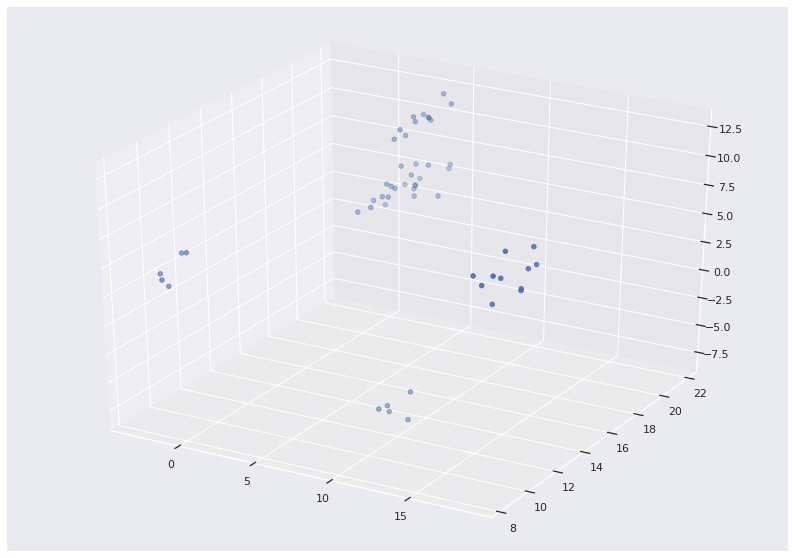

In [355]:
# 3D visualisation with seaborn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

xs = union_embedding3d[:, 0]
ys = union_embedding3d[:, 1] 
zs = union_embedding3d[:, 2]

ax.scatter(xs, ys, zs)

plt.show()

# Cluster explanation 

In [71]:
# dodaj cluster kot atribut in potem classify; ali export v Weka
# 3D dataframes
intersection3d_df
union3d_df
# use Weka and See5 (Quinlan) [moraš poklicat s !]
# https://colab.research.google.com/drive/1A9bZkPvXPAViipan7u9siQfkakChyYFV?usp=sharing#scrollTo=CgxRusBSCxrn

# Decision trees

In [396]:
from sklearn import tree
target_class = "Already_used_DSS"
X = df_noNaN[[_ for _ in list(ohe_df.columns) if _ not in target_class]]
Y = df_noNaN[target_class]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

[Text(390.6, 407.70000000000005, 'Already_used_DSS <= 1.5\ngini = 0.278\nsamples = 54\nvalue = [9, 45]\nclass = l'),
 Text(195.3, 135.89999999999998, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = A'),
 Text(585.9000000000001, 135.89999999999998, 'gini = 0.0\nsamples = 45\nvalue = [0, 45]\nclass = l')]

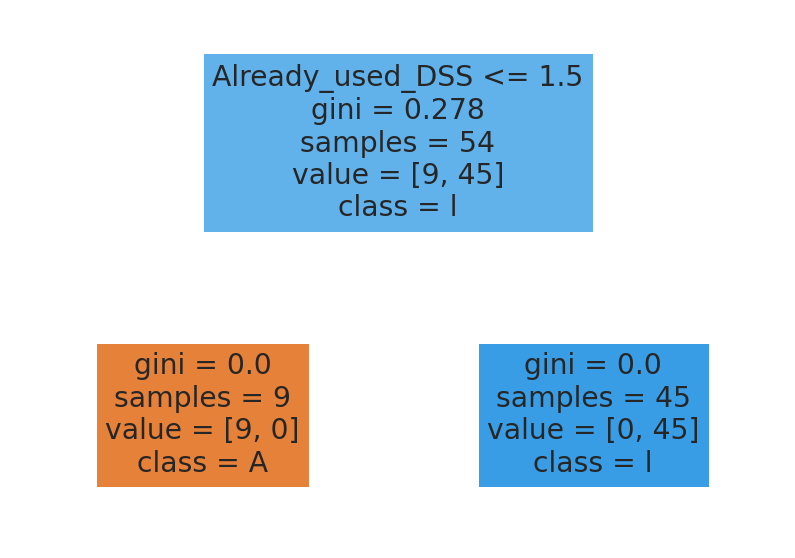

In [401]:
#tree.plot_tree(clf, feature_names=list(X.columns)) 
tree.plot_tree(clf, 
              feature_names=all_col_names,  
              class_names="Already_used_DSS",
              filled=True)

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(X, Y)
r = export_text(decision_tree, feature_names=list(X.columns))
print(r)

|--- How_do_you_access_DSS_Cat <= 1.50
|   |--- class: 0.0
|--- How_do_you_access_DSS_Cat >  1.50
|   |--- class: 1.0



In [404]:
# """Ne morem importat, nek conflict
# import graphviz 
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("IPM") 
# """

# create dictionary with value mapping

In [403]:
# df["test"] = df["Age_Cat"].replace({4:"več kot 50", 3: "test", 1 : "sdfsdf", 2 : "wsf"})
# df["Age_Cat"] = df["Age_Cat"].replace({4:"več kot 50", 3: "test", 1 : "sdfsdf", 2 : "wsf"})